# Bike Sharing Assignment

### Problem Statement
<br>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. <br><br> A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br><br>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- <i> Which variables are significant in predicting the demand for shared bikes.</i>
- <i> How well those variables describe the bike demands</i>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset consists of 730 roes and 16 columns. <br>There are no null values. <br>The data consists of types `int64` and `float64` with one column of type `object`

In [6]:
df.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

The `object` type column `dteday` consists of date values

### Exploring Data

#### 1. Drop unnecessary columns

- `instant` is an indexing column, it can be removed
- we don't really need `dteday` as there are other columns such as `year`, `mnth` and `weekday` already
- columns `casual` and `registered` are described using the colum `cnt`, seems like a redundancy

In [7]:
drop_columns = ["instant", "dteday", "casual", "registered"]
df.drop(drop_columns, axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### 2. Checking for outliers

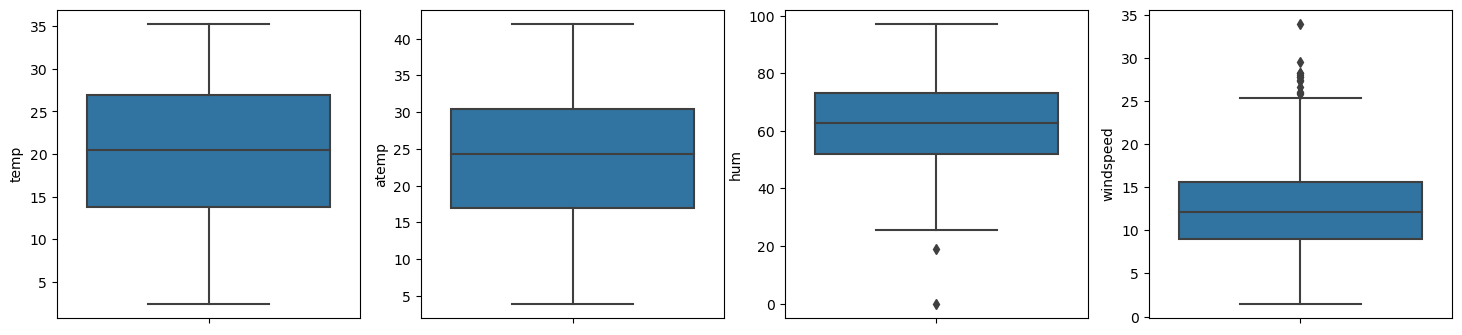

In [8]:
continuous_var_colums = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

for col in range(1, len(continuous_var_colums)+1):
    plt.subplot(1,4,col)
    sns.boxplot(y=continuous_var_colums[col-1], data=df)

doesn't look like there are any outlying values for the described continuous variable|

#### 3. Categorizing variable

In [9]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'clear',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace=True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace=True)

# df.yr.replace({0: "2018", 1: "2019"}, inplace=True)

df.head()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualizing the data

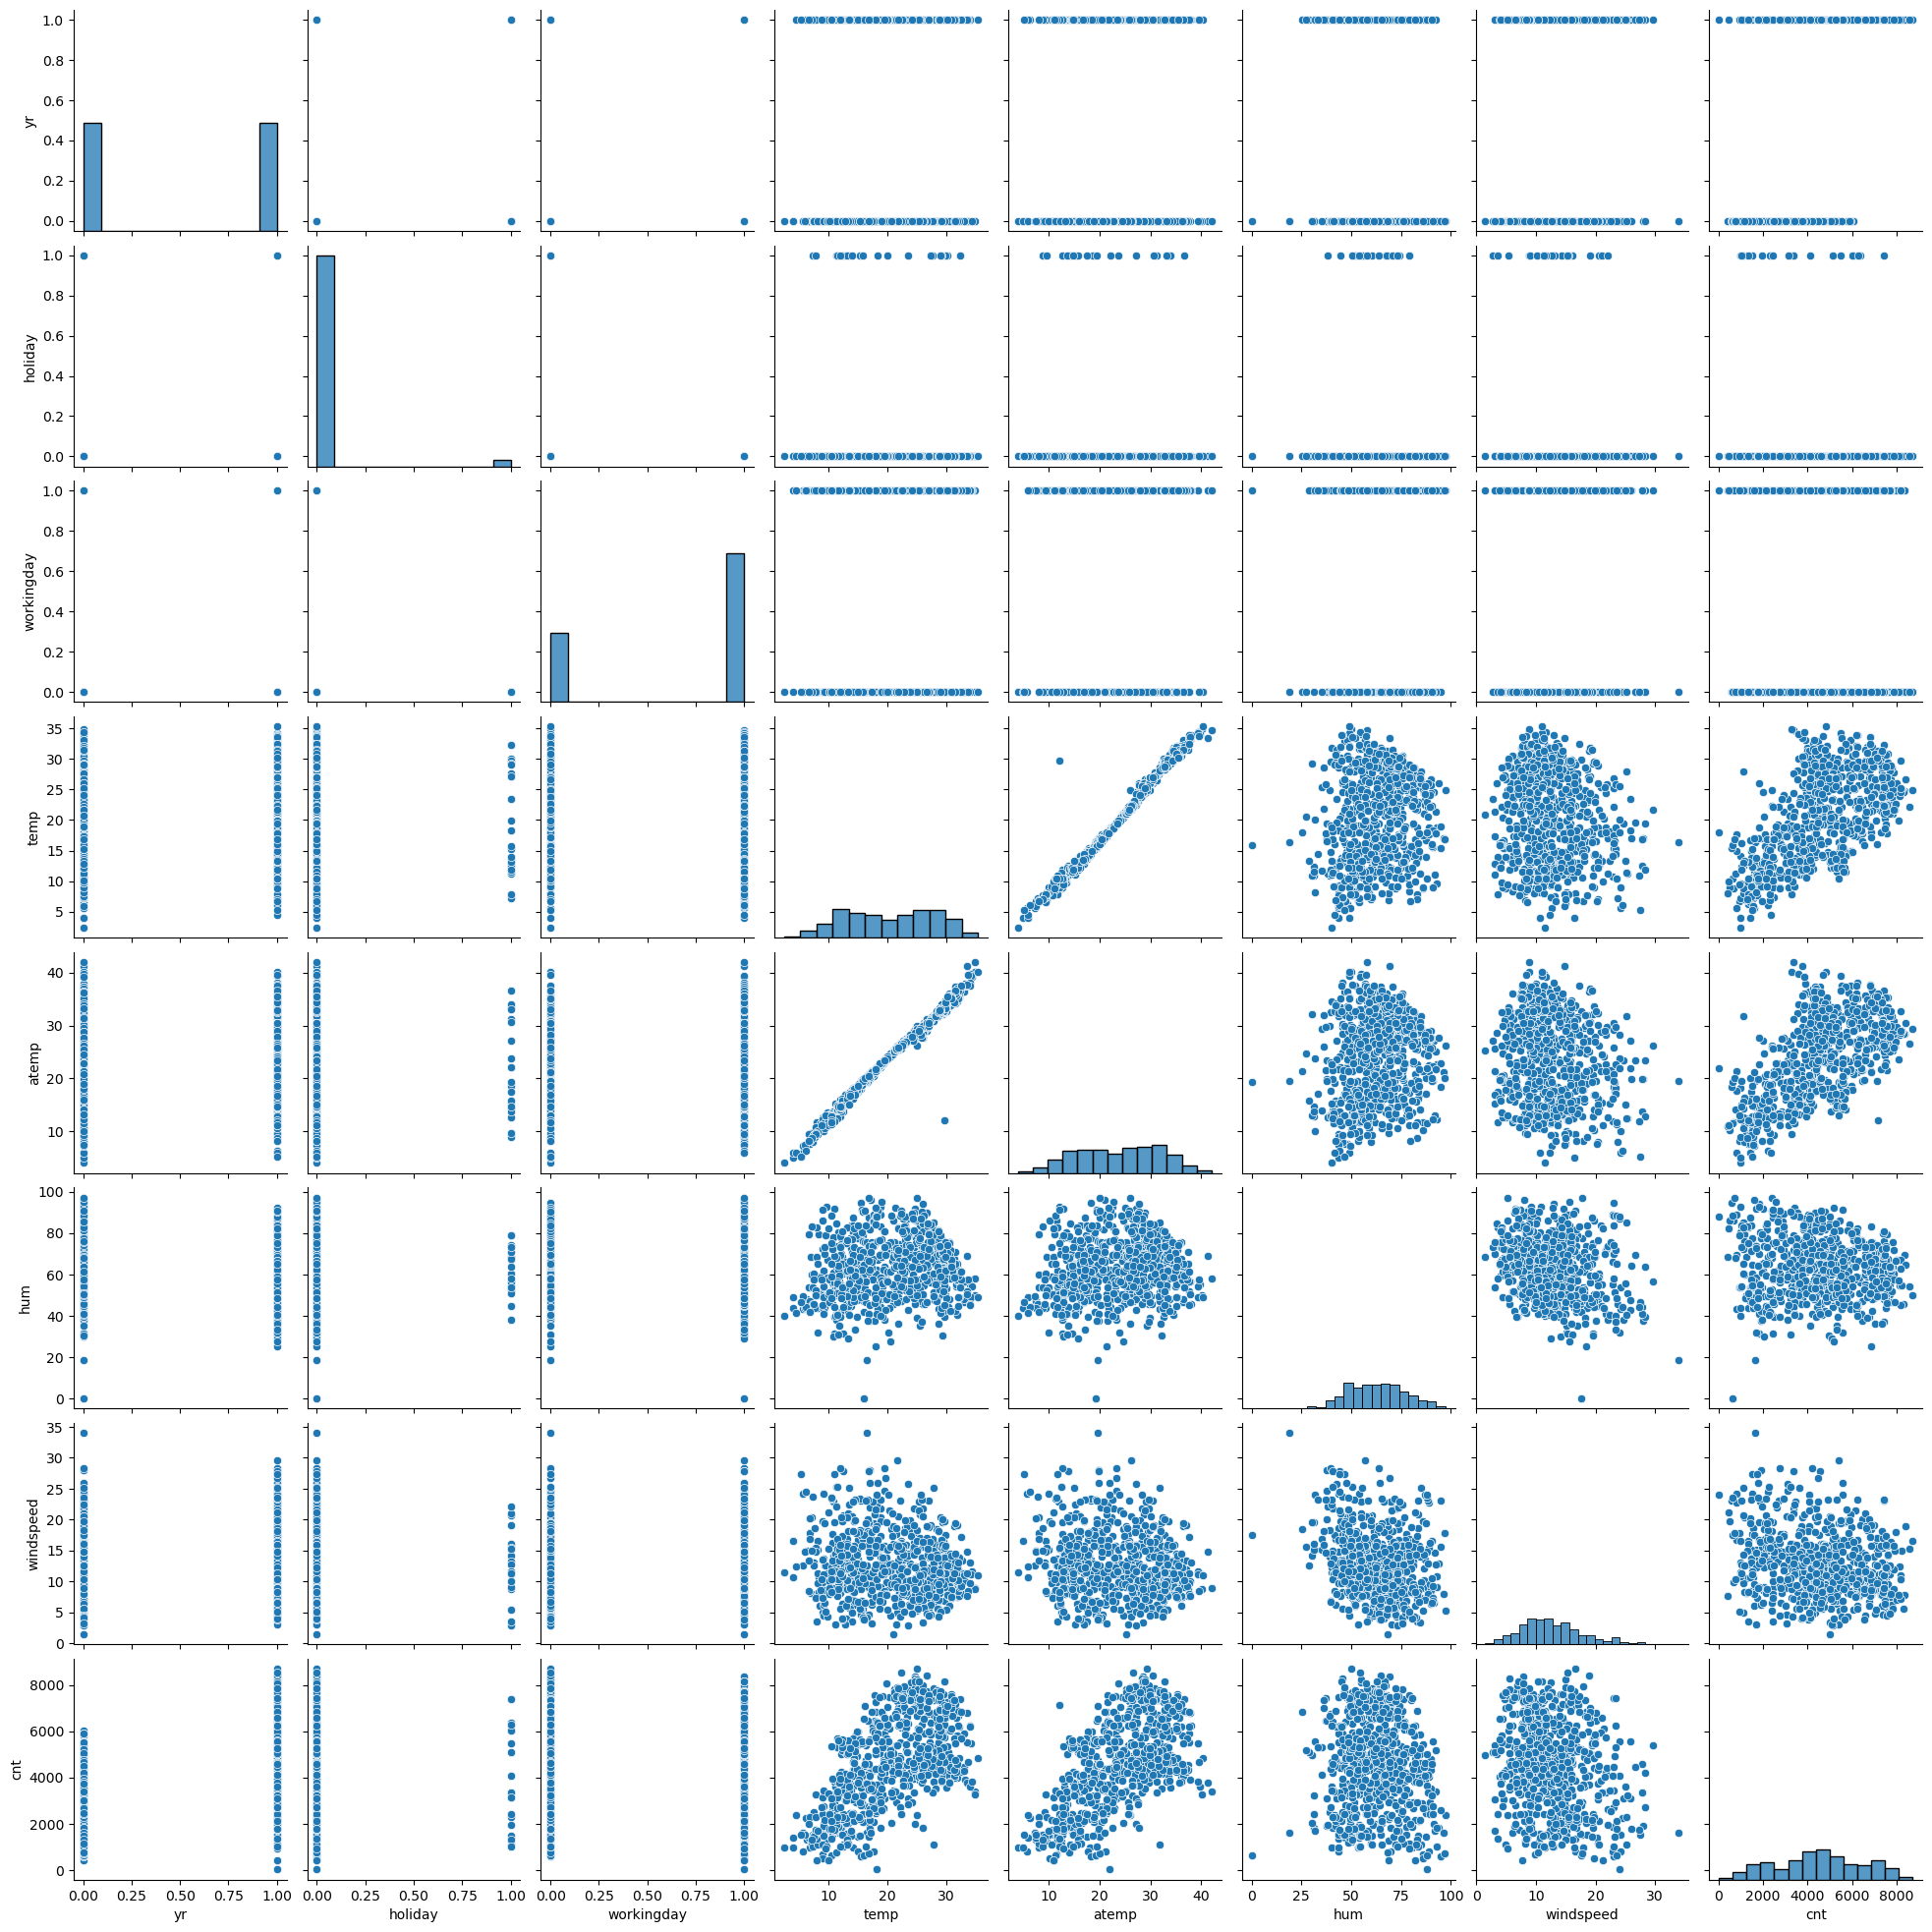

In [11]:
sns.pairplot(df)

Looking at the scatterplots, seems like `temp` and `atemp` have the highest correlation with the target variable `cnt`<br><br>Also, `temp` and `atemp` are highly correlated with each other

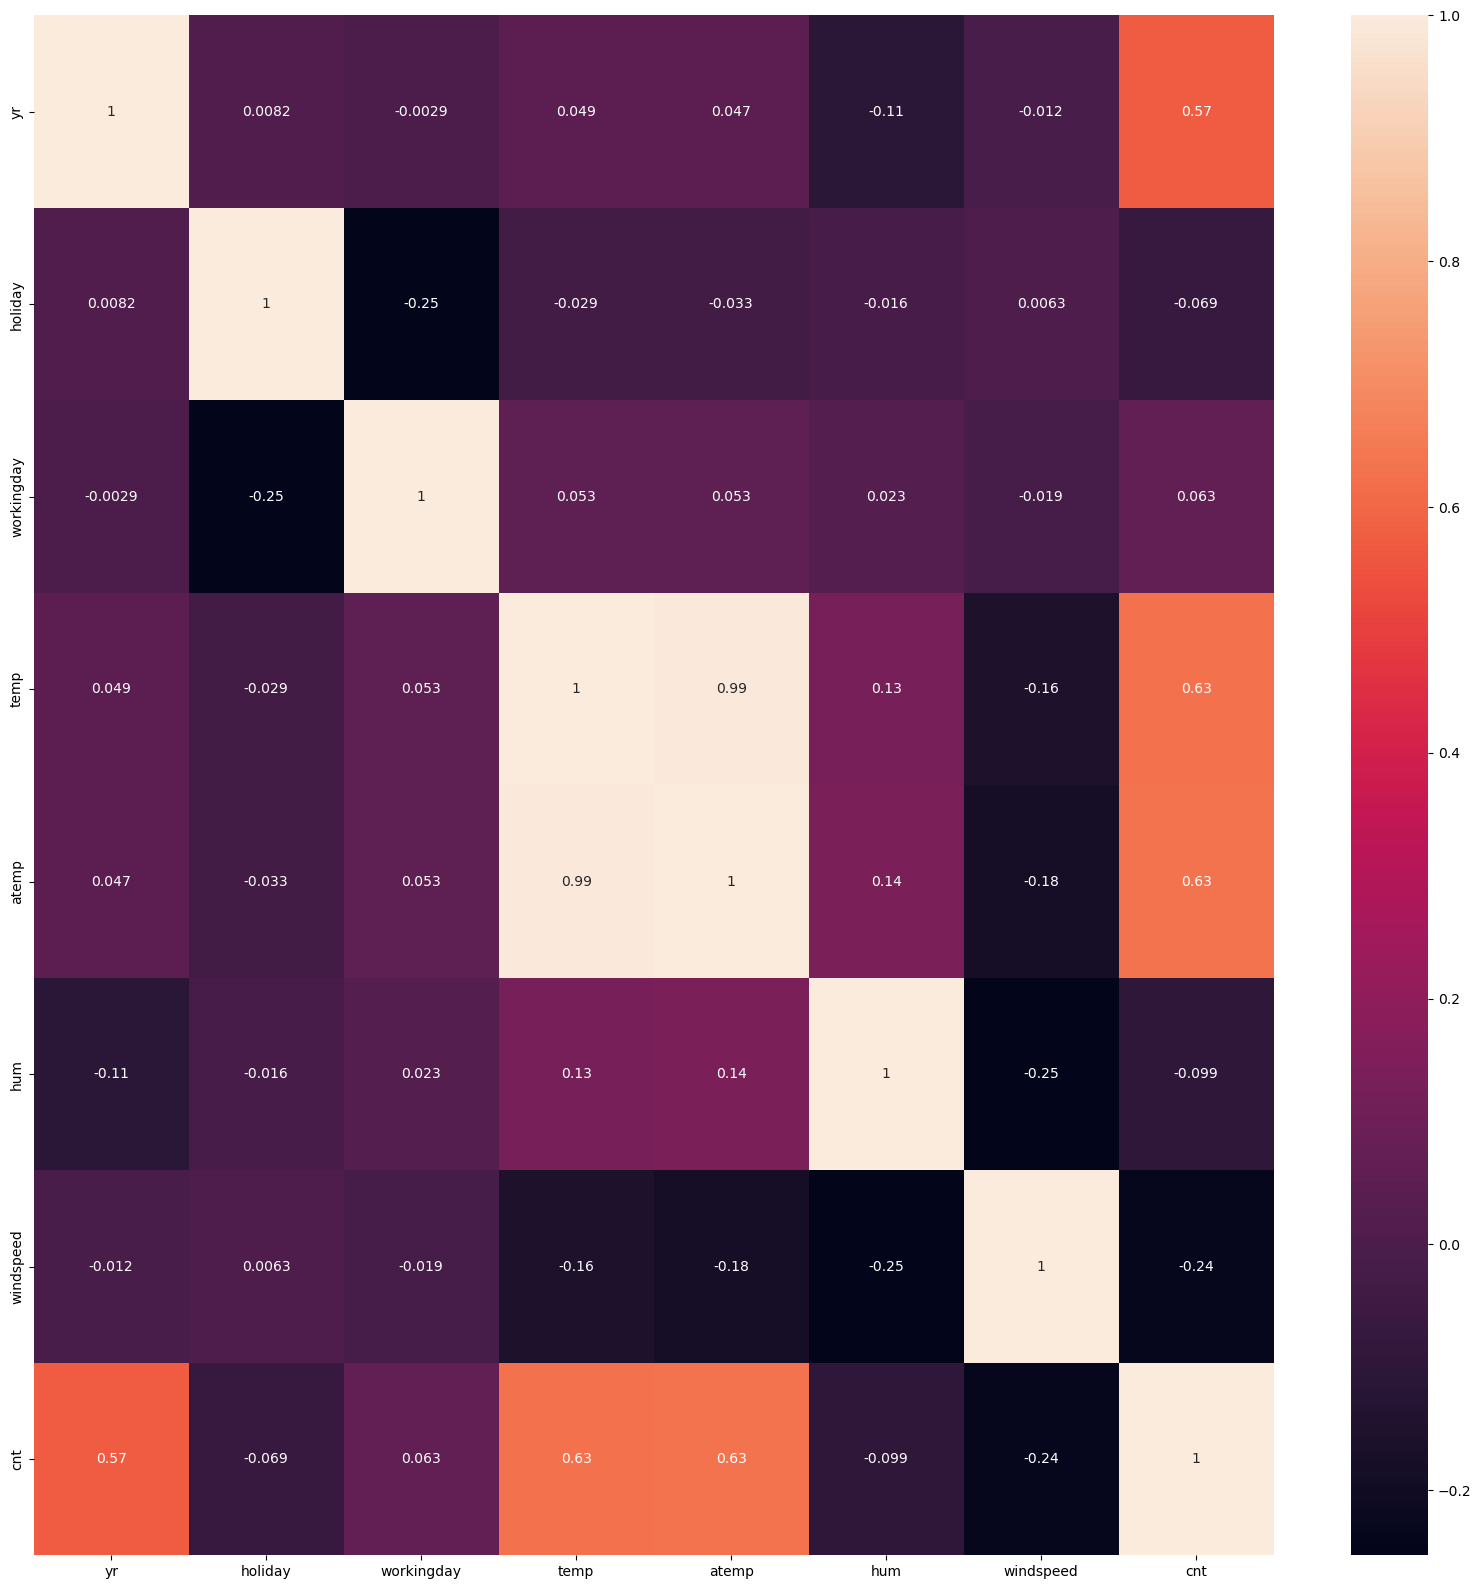

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

looking at a few of the continuous variables up close

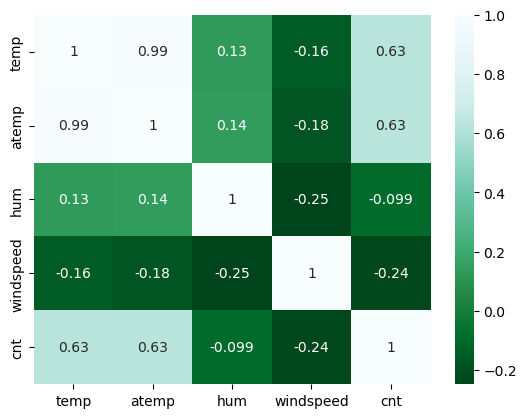

In [13]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn_r', annot = True)
plt.show()

We see that `temp` and `atemp` have a correlation of almost 1

Let's take a look at some categorical variables as well

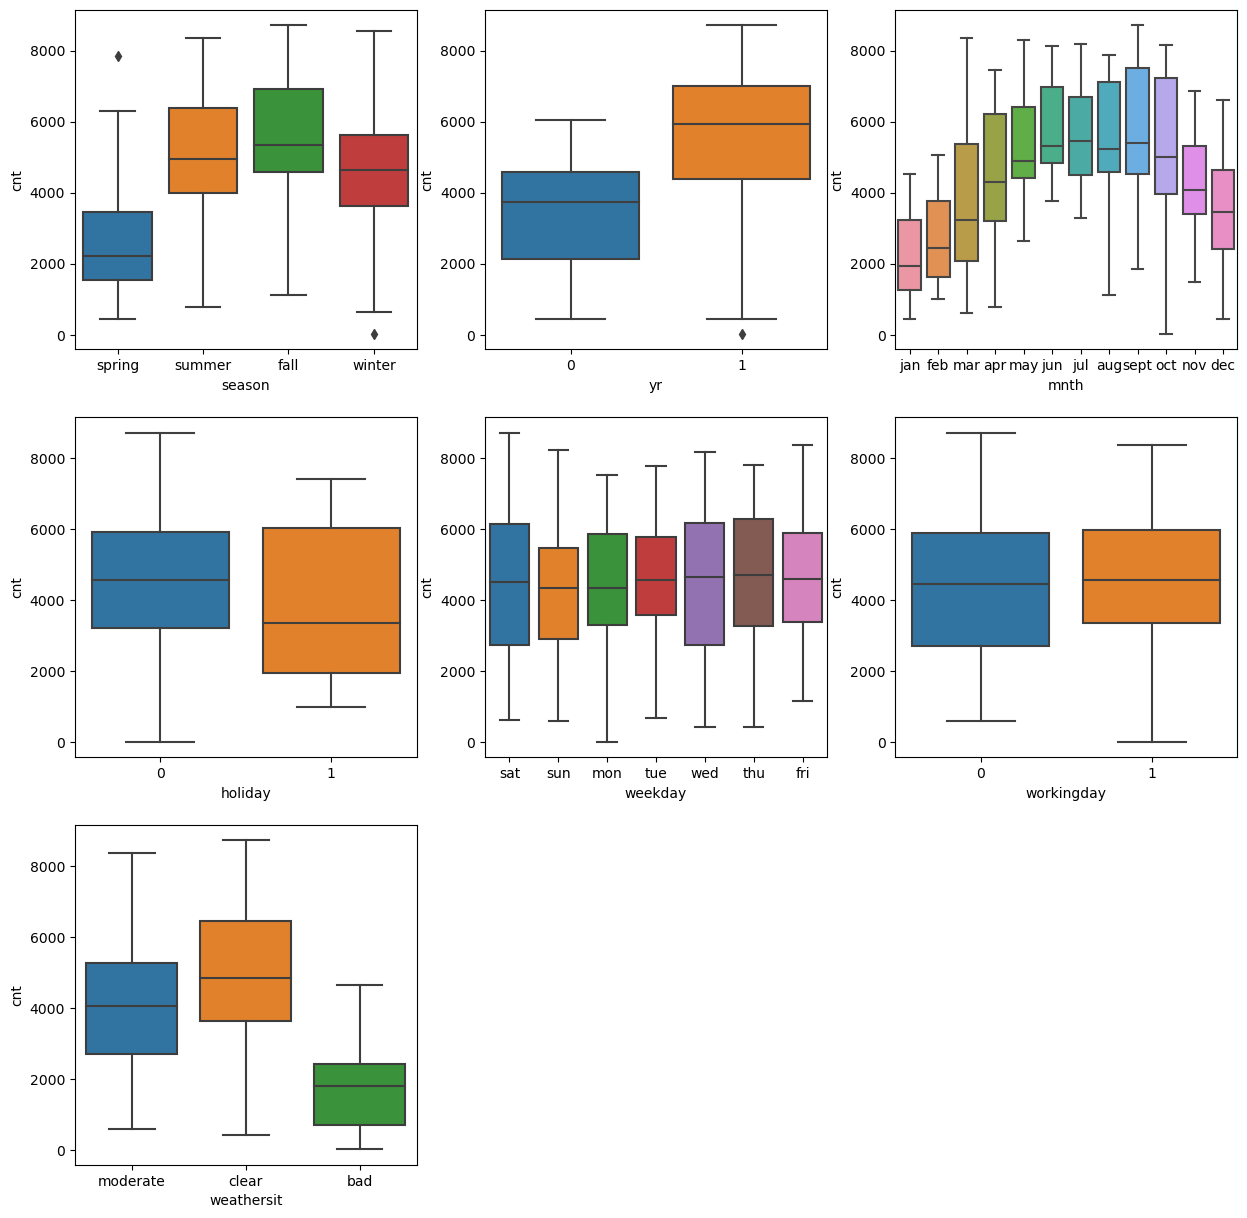

In [14]:
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

Inference:
1. While Seasons are considered, fall has the highest demand for rental bikes
2. The year 2019 showed considerably larger demand for rentals as opposed to the previous year 2018
3. Monthwise demand shows that there is a steady increase till the month of June. After which there is some inconsistent demand and the demand falls off in the months of November and December
4. Demand seems to be higher on non-holidays.
5. Weekdays do not seem to show a change in demand.
6. Rentals are used more often when the weather allows it. i.e. when the weather is clear.

### Preparing Data

#### Creating Dummy Variables
Convert categorical variable into dummy/indicator variables.

In [15]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_clear',
       'weathersit_moderate'],
      dtype='object')

In [16]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_clear,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


###  Model Building

#### Splitting Data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y=df.pop('cnt')

X=df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [19]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_clear,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [21]:

print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


#### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
continuous_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])

In [24]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_clear,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.506849,0.025440,0.671233,0.545806,0.521933,0.643599,0.367288,0.252446,0.236791,0.240705,...,0.086106,0.140900,0.152642,0.150685,0.135029,0.138943,0.148728,0.029354,0.643836,0.326810
std,0.500443,0.157613,0.470225,0.229917,0.214945,0.146660,0.189344,0.434842,0.425529,0.427930,...,0.280795,0.348259,0.359994,0.358092,0.342090,0.346226,0.356169,0.168963,0.479334,0.469507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351535,0.342022,0.528982,0.227630,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.564921,0.550854,0.641907,0.346897,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744560,0.698395,0.751610,0.474857,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### RFE

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
# Using Linear Regression as an estimator, selecting 15 features
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [28]:
# Features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', True, 1),
 ('mnth_aug', False, 15),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 6),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_clear', True, 1),
 ('weathersit_moderate', False, 2)]

#### Manual Elimination

In [29]:
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_clear'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'season_summer', 'mnth_aug', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [31]:
# Taking 15 features selected by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

##### Model I

In [32]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# For model-I we add all columns selected by RFE
target_columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.06e-187
Time:                        02:05:21   Log-Likelihood:                -4126.8
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2131.7691    

##### Model II

Dropping `mnth_jan` for its high p-value

In [34]:
target_columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.36e-188
Time:                        02:05:21   Log-Likelihood:                -4127.4
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2090.2482    

##### Model III

Dropping `holiday` for its high p-value

In [35]:
target_columns = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.00e-189
Time:                        02:05:21   Log-Likelihood:                -4129.1
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     497   BIC:                             8345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2024.7109    

##### Model IV

Since all the p-values appear to be below 0.05, we can consider the VIF values

Dropping `hum` for its high VIF

In [36]:
target_columns = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.73e-185
Time:                        02:05:21   Log-Likelihood:                -4140.3
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     498   BIC:                             8362.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1214.3734    

##### Model V

Dropping `mnth_jul` for its high p-value

In [37]:
target_columns = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.96e-186
Time:                        02:05:22   Log-Likelihood:                -4142.0
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     499   BIC:                             8359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1156.0140    

##### Model VI

Removing `temp` as it has a high VIF

target_columns = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

Here, the VIF and p-values seem to be in an acceptable range. <br>But we have an R-squared value of about 0.76, lets try to improve it

##### Model VII

We can try replacing `weekday_sat` with `weekday_sun`

target_columns = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

##### Model VIII

target_columns = ['yr', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[target_columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[target_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

print(vif.sort_values(by='VIF',ascending=False))

In [38]:

lr = LinearRegression()
lr.fit(X_train[target_columns],y_train)
print(lr.intercept_,lr.coef_)

1156.0140223078988 [ 2084.85634347   443.17682721  4093.7469528   -594.37319134
  -652.67808312   420.50200294   840.99095309   672.11771596
   515.02424448 -2340.78195689  -616.70255368]


### Model Evaluation

In [39]:
from sklearn.metrics import r2_score

In [40]:

y_train_pred = lr.predict(X_train[target_columns])


C:\Users\Howl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

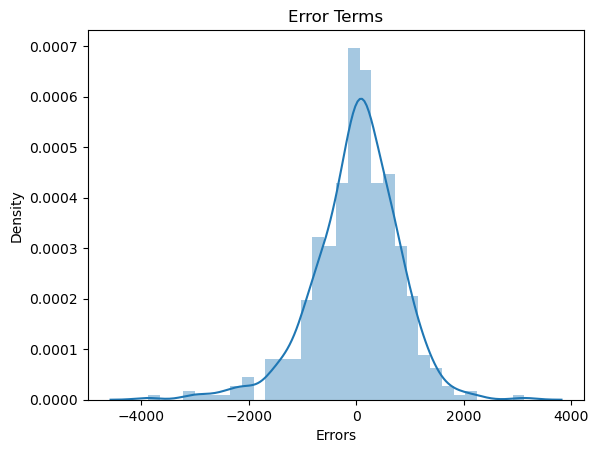

In [41]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

Errors are normally distributed around a mean 0

In [42]:
r2_score(y_train,y_train_pred)

0.8330412442660464

In [43]:
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [44]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[target_columns])

In [45]:
r2_score(y_test,y_test_pred)

0.8163714664588011